In [1]:
import sys
import os
sys.path.append(os.path.abspath("/home/jose/Dropbox/Doktorarbeit/"))
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from reading_robot import load_data, describe_data, get_metadata, classify, st_tests, text2features, feature_analysis, cull_data
import pandas as pd
import glob
import os
import re
import numpy as np
from scipy import stats

In [2]:
wdir = "/home/jose/Dropbox/Doktorarbeit/publications/201902 Stylistics/publication/data/"

# Getting Data

In [3]:
corde_freq_df = pd.read_parquet(wdir + "corde_comp_low_7000.pqt")
corde_freq_df.shape

/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


(34152, 7000)

In [4]:
corde_freq_df.head()

token,de,se,una,para,la,",",en,el,y,a,...,pasamos,veinticinco,vol,tam,vertical,nº,pétalos,bsol,pereza,huellas
aazorin,2126.0,748.0,626.0,130.0,1560.0,3735.0,1274.0,1077.0,1700.0,980.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abacca,4911.0,880.0,879.0,349.0,2808.0,6764.0,2075.0,1790.0,2313.0,1284.0,...,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
abaddon,7327.0,2059.0,1395.0,808.0,4541.0,11181.0,3573.0,3594.0,4248.0,2978.0,...,1.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
abadengo,5029.0,829.0,358.0,335.0,2155.0,7101.0,2156.0,2351.0,1839.0,1286.0,...,1.0,2.0,2.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0
abajo,1786.0,551.0,300.0,129.0,1117.0,2664.0,625.0,728.0,1310.0,933.0,...,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
corde_metadatos_df = pd.read_csv(wdir + "corde_comp_metadatos.csv", sep = "\t", index_col = 0)
corde_metadatos_df.shape

(34155, 17)

In [6]:
corde_metadatos_df.index = corde_metadatos_df["archivo"]

In [7]:
corde_metadatos_df.head()

,archivo,titulo,autor,pais,fechacre,tema,medio,formas,tokens,types,prim_fecha,siglo,continente,matiz_fecha,prim_tema,secund_tema,abs_tema
archivo,,,,,,,,,,,,,,,,,
defunsio,defunsio,Defunsión de don Enrique de Villena,Marqués de Santillana (Íñigo López de Mendoza),España,1434,Verso lírico culto: Individual,Libro,1205,1404,680,1434,15,Europa,NaN,Verso lírico culto,Individual,Verso
docramirsub139,docramirsub139,Concesión del derecho de usufructo de una casa...,Anónimo,España,1094,Derecho: Documentos notariales,Libro,382,409,218,1094,11,Europa,NaN,Derecho,Documentos notariales,Técnico
rosagentsub25,rosagentsub25,Romance [Rosa gentil. Tercera parte de romance...,Anónimo,España,1573,Verso lírico culto: En obras colectivas,Libro,351,388,203,1573,16,Europa,NaN,Verso lírico culto,En obras colectivas,Verso
noticiersub11,noticiersub11,Sin título [El Noticiero Universal. Diario ind...,Anónimo,España,1899,Prensa,Prensa,73,84,56,1899,19,Europa,NaN,Prensa,Prensa,Técnico
heclesia,heclesia,Historia eclesiástica de España. Tomo I: El cr...,"García Villada, Zacarías",España,1929,Religión: Otros,Libro,266259,323574,29245,1929,20,Europa,NaN,Religión,Otros,Técnico


# Cleaning Data

In [8]:
documents_over_100_tokens_lt = list(corde_freq_df.sum(axis=1)[corde_freq_df.sum(axis=1) > 100].index)

In [9]:
len(documents_over_100_tokens_lt)

29867

In [10]:
corde_metadatos_long_doctuments_df = corde_metadatos_df.loc[documents_over_100_tokens_lt]

In [11]:
corde_metadatos_modern_df = corde_metadatos_long_doctuments_df.loc[corde_metadatos_long_doctuments_df["siglo"]>15].dropna(subset=["prim_tema"])

In [12]:
corde_modern_freq_df = corde_freq_df.loc[corde_metadatos_modern_df.index]

In [13]:
for text in corde_modern_freq_df.index.tolist():
    sum_ = corde_modern_freq_df.loc[text].sum()
    if sum_ > 1000 + corde_metadatos_modern_df.loc[text]["tokens"]:
        print(text)


cocina~1
floresta


In [14]:
corde_modern_freq_df = corde_modern_freq_df.drop(["cocina~1","floresta"])

In [15]:
corde_metadatos_modern_df = corde_metadatos_modern_df.drop(["cocina~1","floresta"])

In [16]:
corde_metadatos_modern_df.index.tolist() == corde_modern_freq_df.index.tolist()

True

In [17]:
corde_metadatos_modern_df.shape

(18709, 17)

In [18]:
corde_modern_freq_df.shape

(18709, 7000)

In [19]:
corde_modern_freq_df.sum().sum()

192404282.0

In [20]:
classes_lt = sorted(list(set(corde_metadatos_modern_df["prim_tema"])))

In [21]:
corde_metadatos_modern_df = pd.merge(corde_metadatos_modern_df,pd.get_dummies(corde_metadatos_modern_df[["prim_tema"]], prefix="", prefix_sep=""), left_index =True, right_index=True)

In [22]:
corde_metadatos_modern_df

,archivo,titulo,autor,pais,fechacre,tema,medio,formas,tokens,types,...,Prosa narrativa extensa,Religión,Sociedad,Verso dramático,Verso dramático breve,Verso dramático extenso,Verso lírico culto,Verso lírico tradicional,Verso narrativo culto,Verso narrativo tradicional
archivo,,,,,,,,,,,,,,,,,,,,,
aazorin,aazorin,Antonio Azorín,Azorín (José Martínez Ruiz),España,1903,Prosa narrativa extensa: Novela y otras formas...,Libro,46506,55549,9088,...,1,0,0,0,0,0,0,0,0,0
abacca,abacca,Invitación a filosofar,"García Bacca, Juan David",España,1940 1942,ciencias sociales y humanidades: Filosofía y é...,Libro,72409,86842,7569,...,0,0,0,0,0,0,0,0,0,0
abaddon,abaddon,Abaddón el exterminador,"Sábato, Ernesto",Argentina,1974,Prosa narrativa extensa: Novela y otras formas...,Libro,151432,176986,20650,...,1,0,0,0,0,0,0,0,0,0
abadengo,abadengo,El Abadengo de Sahagún. Contribución al estudi...,"Puyol y Alonso, Julio",España,1915,Prosa didáctica: Oratoria y discurso,Libro,77110,93321,13484,...,0,0,0,0,0,0,0,0,0,0
abajo,abajo,Los de abajo,"Azuela, Mariano",México,1916,Prosa narrativa extensa: Novela y otras formas...,Libro,35183,44511,7423,...,1,0,0,0,0,0,0,0,0,0
abate,abate,Cartas a su hermano don Carlos Andrés,"Andrés, Juan",España,1793,Historia y documentos: Cartas y relaciones,Libro,16514,18768,3270,...,0,0,0,0,0,0,0,0,0,0
abc1974sub10,abc1974sub10,"Yanguas Messía [ABC, 4 de julio de 1974]","Azcárraga, José Luis de",España,1974,Prensa,Prensa,789,960,428,...,0,0,0,0,0,0,0,0,0,0
abc1974sub100,abc1974sub100,Elección para cubrir concejalías vacantes [ABC...,Anónimo,España,1974,Prensa: Política y gobierno,Prensa,150,168,104,...,0,0,0,0,0,0,0,0,0,0
abc1974sub101,abc1974sub101,"Se hacen efectivos los despidos de Elsa [ABC, ...",Anónimo,España,1974,Prensa,Prensa,268,300,152,...,0,0,0,0,0,0,0,0,0,0


In [23]:
classes_lt

['Artes y espectáculos',
 'Ciencias aplicadas',
 'Ciencias exactas, físicas y naturales',
 'Ciencias sociales y humanidades',
 'Derecho',
 'Historia y documentos',
 'Prensa',
 'Prosa',
 'Prosa didáctica',
 'Prosa dramática',
 'Prosa dramática breve',
 'Prosa dramática extensa',
 'Prosa lírica',
 'Prosa narrativa breve',
 'Prosa narrativa extensa',
 'Religión',
 'Sociedad',
 'Verso dramático',
 'Verso dramático breve',
 'Verso dramático extenso',
 'Verso lírico culto',
 'Verso lírico tradicional',
 'Verso narrativo culto',
 'Verso narrativo tradicional']

In [24]:
len(classes_lt)

24

In [25]:
classification_results_df = pd.read_csv(wdir + "results.tsv", sep="\t", index_col = 0)

In [26]:
classification_results_df

,class,mean_f1,mean_rec,mean_prec,f1_macro,f1_micro,baseline,f1-baseline,classifier_name,text_representation,MFW,typography,f1s,test_result_pvalue,labels,sample_size,cv,sampling_times,classifier
152,Prosa lírica,1.000,1.000,1.000,1.000,1.000,0.500,0.500,SVC,binary,2000,False,[1. 1. 0.67 1. 1. 0. 0. 1. 0. ...,1.404023e-04,archivo\ndocupintsub57 0\nplatero ...,30,10,5,"SVC(C=1.0, cache_size=200, class_weight=None, ..."
118,Prosa dramática,1.000,1.000,1.000,1.000,1.000,0.500,0.500,RF,tfidf,4000,False,[1. 0.67 1. 1. 1. 1. 1. 1. 1. ...,9.003515e-20,archivo\nvaldiviesub9 1\ncampeonsub13 ...,40,10,5,BaggingClassifier(base_estimator=DecisionTreeC...
555,Prosa dramática extensa,0.988,1.000,0.977,0.987,0.988,0.500,0.488,Ridge,log,3000,False,[1. 0.92 0.96 1. 1. 0.96 0.89 0.96 0.92 ...,5.674879e-58,archivo\nvalleincsub4 1\ncrxsub90 ...,244,10,5,"RidgeClassifier(alpha=1.0, class_weight=None, ..."
574,Prosa dramática extensa,0.988,0.992,0.985,0.987,0.988,0.500,0.488,Ridge,binary,4000,False,[1. 1. 1. 1. 1. 1. 1. 0.96 0.92 ...,1.355723e-63,archivo\namorpues 1\nlatigra ...,244,10,5,"RidgeClassifier(alpha=1.0, class_weight=None, ..."
548,Prosa dramática extensa,0.988,0.992,0.985,0.987,0.988,0.500,0.488,Ridge,binary,2000,True,[0.96 0.96 1. 0.96 1. 1. 1. 0.92 1. ...,5.374440e-61,archivo\ncansepulsub9 0\nelpublic ...,244,10,5,"RidgeClassifier(alpha=1.0, class_weight=None, ..."
113,"Ciencias exactas, físicas y naturales",0.986,0.981,0.992,0.986,0.986,0.500,0.486,LR,zscores,5000,True,[1. 1. 0.9 0.91 0.96 0.96 0.96 1. 1. ...,7.706524e-59,archivo\nobsastro 1\nromance1sub18 ...,216,10,5,"LogisticRegression(C=1.0, class_weight=None, d..."
133,Prosa dramática extensa,0.985,0.992,0.979,0.984,0.984,0.500,0.485,SVC,binary,1000,True,[1. 1. 0.96 1. 1. 0.92 1. 0.89 0.92 ...,4.131824e-59,archivo\ncuartopo 1\ntoreros ...,244,10,5,"SVC(C=1.0, cache_size=200, class_weight=None, ..."
136,Prosa dramática extensa,0.985,1.000,0.970,0.984,0.984,0.500,0.485,SVC,log,4000,True,[0.96 1. 1. 0.96 0.92 1. 1. 0.96 1. ...,2.722780e-61,archivo\nbodas 1\nelbaile ...,244,10,5,"SVC(C=1.0, cache_size=200, class_weight=None, ..."
137,Prosa dramática extensa,0.985,1.000,0.971,0.984,0.984,0.500,0.485,SVC,log,5000,True,[1. 0.96 0.96 1. 1. 1. 0.92 1. 0.96 ...,2.983320e-58,archivo\npresiden 1\nperiodissub178 ...,244,10,5,"SVC(C=1.0, cache_size=200, class_weight=None, ..."
575,Prosa dramática extensa,0.984,1.000,0.970,0.983,0.983,0.500,0.484,Ridge,binary,5000,False,[1. 1. 0.92 1. 1. 0.92 0.96 0.96 0.96 ...,6.981717e-62,archivo\ndocfilipsub138 0\nepisolmesub270 ...,244,10,5,"RidgeClassifier(alpha=1.0, class_weight=None, ..."


In [27]:
classification_results_df.shape

(5520, 19)

# Obtaining data

In [28]:
classes_results_df = classification_results_df.groupby(["class"]).head(50).groupby(["class"]).mean()[["mean_f1","MFW","sample_size"]]

In [29]:
classes_results_df["std_f1"] = classification_results_df.groupby(["class"]).head(50).groupby(["class"]).std()[["mean_f1"]]

In [30]:
classes_results_df.sort_index(inplace=True)

In [31]:
classes_results_df.shape

(23, 4)

In [32]:
classes_results_df["median_tokens"] = corde_metadatos_modern_df.groupby(["prim_tema"]).head(50).groupby(["prim_tema"]).median().loc[classes_results_df.index].sort_index()["tokens"]
classes_results_df["median_prim_fecha"] = corde_metadatos_modern_df.groupby(["prim_tema"]).head(50).groupby(["prim_tema"]).median().loc[classes_results_df.index].sort_index()["prim_fecha"]
classes_results_df["std_prim_fecha"] = corde_metadatos_modern_df.groupby(["prim_tema"]).head(50).groupby(["prim_tema"]).std().loc[classes_results_df.index].sort_index()["prim_fecha"]



In [33]:
classes_results_df["log_median_tokens"] = np.log(classes_results_df["median_tokens"])

In [34]:
classes_results_df

,mean_f1,MFW,sample_size,std_f1,median_tokens,median_prim_fecha,std_prim_fecha,log_median_tokens
class,,,,,,,,
Artes y espectáculos,0.96132,3840.0,1082.00,0.009351,672.0,1582.0,98.110619,6.510258
Ciencias aplicadas,0.94498,3260.0,206.00,0.007713,26659.5,1834.0,181.222368,10.190901
"Ciencias exactas, físicas y naturales",0.96234,3580.0,216.00,0.008230,82520.0,1881.5,165.168838,11.320796
Ciencias sociales y humanidades,0.87046,3900.0,1000.00,0.020211,4192.5,1929.0,123.459072,8.341052
Derecho,0.88834,3860.0,1000.00,0.017661,698.5,1623.0,106.219497,6.548935
Historia y documentos,0.84404,3880.0,1000.00,0.022784,834.0,1648.0,20.749664,6.726233
Prensa,0.88488,3660.0,1000.00,0.020305,265.5,1974.0,0.000000,5.581615
Prosa,0.88060,3248.0,40.00,0.025549,7259.0,1964.0,32.238054,8.889997
Prosa didáctica,0.88536,3640.0,1130.00,0.017088,1914.0,1842.0,99.584598,7.556951


In [35]:
for column in ["MFW","sample_size","std_f1","median_tokens","median_prim_fecha","std_prim_fecha","log_median_tokens"]:
    print(column, stats.linregress(classes_results_df[column], classes_results_df["mean_f1"]))

MFW LinregressResult(slope=1.0184310463875736e-05, intercept=0.8801112271671574, rvalue=0.1079382731513252, pvalue=0.6239764980030121, stderr=2.0469241641930654e-05)
sample_size LinregressResult(slope=-3.858321429364435e-06, intercept=0.9184974066351799, rvalue=-0.04626163608624892, pvalue=0.8339781288032685, stderr=1.8180362837663332e-05)
std_f1 LinregressResult(slope=-3.209327152725183, intercept=0.967321386628848, rvalue=-0.7159136433520729, pvalue=0.00012238199921023627, stderr=0.6829935563719264)
median_tokens LinregressResult(slope=6.779740939276046e-07, intercept=0.9048351525698765, rvalue=0.41938561927121315, pvalue=0.04636336779611334, stderr=3.2024621985950166e-07)
median_prim_fecha LinregressResult(slope=-6.969592635655356e-05, intercept=1.0387293742770691, rvalue=-0.25845068169035756, pvalue=0.23376070383131126, stderr=5.684708313768414e-05)
std_prim_fecha LinregressResult(slope=0.00038031540255640997, intercept=0.8773934315647732, rvalue=0.4873073773256393, pvalue=0.018349

In [36]:
classes_results_df

,mean_f1,MFW,sample_size,std_f1,median_tokens,median_prim_fecha,std_prim_fecha,log_median_tokens
class,,,,,,,,
Artes y espectáculos,0.96132,3840.0,1082.00,0.009351,672.0,1582.0,98.110619,6.510258
Ciencias aplicadas,0.94498,3260.0,206.00,0.007713,26659.5,1834.0,181.222368,10.190901
"Ciencias exactas, físicas y naturales",0.96234,3580.0,216.00,0.008230,82520.0,1881.5,165.168838,11.320796
Ciencias sociales y humanidades,0.87046,3900.0,1000.00,0.020211,4192.5,1929.0,123.459072,8.341052
Derecho,0.88834,3860.0,1000.00,0.017661,698.5,1623.0,106.219497,6.548935
Historia y documentos,0.84404,3880.0,1000.00,0.022784,834.0,1648.0,20.749664,6.726233
Prensa,0.88488,3660.0,1000.00,0.020305,265.5,1974.0,0.000000,5.581615
Prosa,0.88060,3248.0,40.00,0.025549,7259.0,1964.0,32.238054,8.889997
Prosa didáctica,0.88536,3640.0,1130.00,0.017088,1914.0,1842.0,99.584598,7.556951


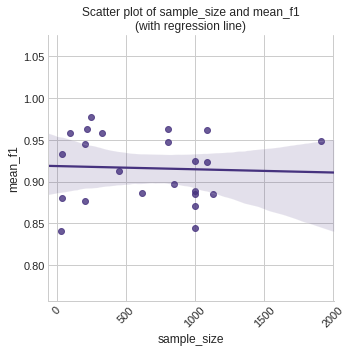

In [37]:
describe_data.describe_corpus_scatter(classes_results_df, wdir, "sample_size","mean_f1","CORDE")

In [38]:
classes_results_df.sort_values(by="median_tokens")

,mean_f1,MFW,sample_size,std_f1,median_tokens,median_prim_fecha,std_prim_fecha,log_median_tokens
class,,,,,,,,
Verso lírico culto,0.92398,3880.0,1000.00,0.017078,164.0,1592.0,157.597524,5.099866
Verso narrativo tradicional,0.91202,3780.0,452.00,0.012632,207.5,1938.0,77.531100,5.335131
Prensa,0.88488,3660.0,1000.00,0.020305,265.5,1974.0,0.000000,5.581615
Verso lírico tradicional,0.92320,3960.0,1082.00,0.016170,339.5,1563.0,58.384216,5.827474
Artes y espectáculos,0.96132,3840.0,1082.00,0.009351,672.0,1582.0,98.110619,6.510258
Derecho,0.88834,3860.0,1000.00,0.017661,698.5,1623.0,106.219497,6.548935
Historia y documentos,0.84404,3880.0,1000.00,0.022784,834.0,1648.0,20.749664,6.726233
Prosa didáctica,0.88536,3640.0,1130.00,0.017088,1914.0,1842.0,99.584598,7.556951
Verso dramático breve,0.94674,3760.0,804.00,0.013957,2021.5,1675.0,71.781815,7.611595


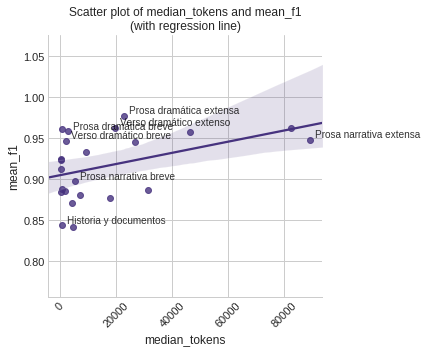

In [41]:
describe_data.describe_corpus_scatter(classes_results_df, wdir, "median_tokens","mean_f1","CORDE", annotation_lt=["Verso dramático breve","Prosa dramática extensa","Prosa narrativa breve","Verso dramático extenso","Historia y documentos", "Prosa narrativa extensa","Prosa dramática breve"], height = 5 , aspect = 1.2)

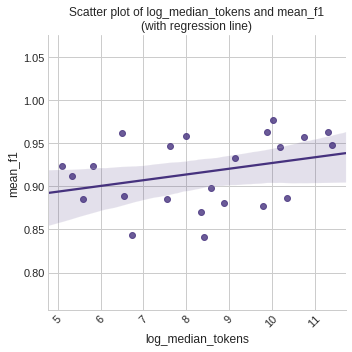

In [40]:
describe_data.describe_corpus_scatter(classes_results_df, wdir, "log_median_tokens","mean_f1","CORDE")

In [44]:
corde_metadatos_df

,archivo,titulo,autor,pais,fechacre,tema,medio,formas,tokens,types,prim_fecha,siglo,continente,matiz_fecha,prim_tema,secund_tema,abs_tema
archivo,,,,,,,,,,,,,,,,,
defunsio,defunsio,Defunsión de don Enrique de Villena,Marqués de Santillana (Íñigo López de Mendoza),España,1434,Verso lírico culto: Individual,Libro,1205,1404,680,1434,15,Europa,NaN,Verso lírico culto,Individual,Verso
docramirsub139,docramirsub139,Concesión del derecho de usufructo de una casa...,Anónimo,España,1094,Derecho: Documentos notariales,Libro,382,409,218,1094,11,Europa,NaN,Derecho,Documentos notariales,Técnico
rosagentsub25,rosagentsub25,Romance [Rosa gentil. Tercera parte de romance...,Anónimo,España,1573,Verso lírico culto: En obras colectivas,Libro,351,388,203,1573,16,Europa,NaN,Verso lírico culto,En obras colectivas,Verso
noticiersub11,noticiersub11,Sin título [El Noticiero Universal. Diario ind...,Anónimo,España,1899,Prensa,Prensa,73,84,56,1899,19,Europa,NaN,Prensa,Prensa,Técnico
heclesia,heclesia,Historia eclesiástica de España. Tomo I: El cr...,"García Villada, Zacarías",España,1929,Religión: Otros,Libro,266259,323574,29245,1929,20,Europa,NaN,Religión,Otros,Técnico
mutissub60,mutissub60,A don Juan José D'Elhuyar [Cartas de José Cele...,"Mutis, José Celestino",Colombia,1787,Historia y documentos: Cartas y relaciones,Libro,57,72,52,1787,18,América,NaN,Historia y documentos,Cartas y relaciones,Técnico
docurel1sub275,docurel1sub275,Fernando concede salvoconducto [Documentos sob...,Anónimo,España,1493,Derecho: Documentos notariales,Revista,289,340,168,1493,15,Europa,NaN,Derecho,Documentos notariales,Técnico
docuara1sub44,docuara1sub44,Pintura de un escudo para el sepulcro de Martí...,Anónimo,España,1413,Artes y espectáculos: Pintura,Libro,49,59,44,1413,15,Europa,NaN,Artes y espectáculos,Pintura,Técnico
ordenansub179,ordenansub179,"Reglamento [Leyes, reales decretos, reglamento...",Anónimo,España,1908,Derecho: Ordenamientos y códigos legales,Libro,1208,1359,502,1908,20,Europa,NaN,Derecho,Ordenamientos y códigos legales,Técnico


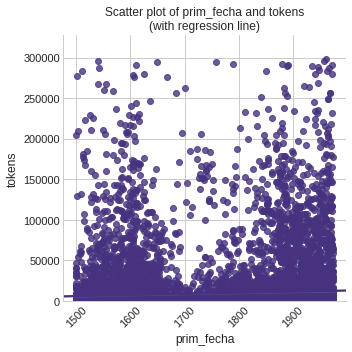

In [45]:
describe_data.describe_corpus_scatter(corde_metadatos_modern_df.loc[corde_metadatos_modern_df["tokens"] < 300000], wdir, "prim_fecha","tokens","CORDE")

In [46]:
stats.linregress(corde_metadatos_modern_df["prim_fecha"], corde_metadatos_modern_df["tokens"])

LinregressResult(slope=10.415016243410868, intercept=-6012.201133513603, rvalue=0.030385562096123427, pvalue=3.2267280180610505e-05, stderr=2.504897867259239)

In [52]:
classes_results_df.rename(columns={"median_prim_fecha": "median_date"}).sort_values(by="median_date")

,mean_f1,MFW,sample_size,std_f1,median_tokens,median_date,std_prim_fecha,log_median_tokens
class,,,,,,,,
Verso lírico tradicional,0.92320,3960.0,1082.00,0.016170,339.5,1563.0,58.384216,5.827474
Artes y espectáculos,0.96132,3840.0,1082.00,0.009351,672.0,1582.0,98.110619,6.510258
Verso lírico culto,0.92398,3880.0,1000.00,0.017078,164.0,1592.0,157.597524,5.099866
Religión,0.95754,3240.0,324.00,0.006759,46313.0,1596.5,131.411646,10.743178
Verso dramático extenso,0.96276,3340.0,804.00,0.006733,19587.5,1616.5,74.777537,9.882647
Prosa dramática breve,0.95820,3580.0,96.00,0.011643,2942.0,1618.5,158.146108,7.986845
Prosa dramática,0.93242,2596.0,40.00,0.029867,9418.0,1622.0,71.860446,9.150378
Derecho,0.88834,3860.0,1000.00,0.017661,698.5,1623.0,106.219497,6.548935
Verso narrativo culto,0.87692,3280.0,200.00,0.012155,17984.0,1627.0,111.567724,9.797238


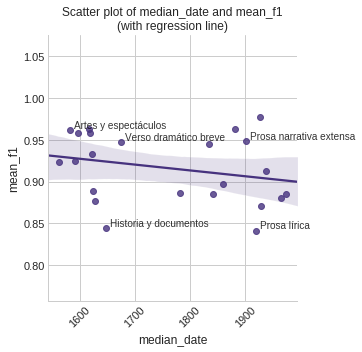

In [56]:
describe_data.describe_corpus_scatter(classes_results_df.rename(columns={"median_prim_fecha": "median_date"}), wdir, "median_date","mean_f1","CORDE", annotation_lt = ["Artes y espectáculos","Verso dramático breve","Historia y documentos","Prosa lírica","Prosa narrativa extensa"])

In [57]:
classes_results_df.sort_values(by="std_prim_fecha")

,mean_f1,MFW,sample_size,std_f1,median_tokens,median_prim_fecha,std_prim_fecha,log_median_tokens
class,,,,,,,,
Prensa,0.88488,3660.0,1000.00,0.020305,265.5,1974.0,0.000000,5.581615
Prosa lírica,0.84142,2296.0,30.00,0.045909,4578.0,1919.0,18.704469,8.429018
Historia y documentos,0.84404,3880.0,1000.00,0.022784,834.0,1648.0,20.749664,6.726233
Prosa,0.88060,3248.0,40.00,0.025549,7259.0,1964.0,32.238054,8.889997
Verso lírico tradicional,0.92320,3960.0,1082.00,0.016170,339.5,1563.0,58.384216,5.827474
Verso dramático breve,0.94674,3760.0,804.00,0.013957,2021.5,1675.0,71.781815,7.611595
Prosa dramática,0.93242,2596.0,40.00,0.029867,9418.0,1622.0,71.860446,9.150378
Verso dramático extenso,0.96276,3340.0,804.00,0.006733,19587.5,1616.5,74.777537,9.882647
Verso narrativo tradicional,0.91202,3780.0,452.00,0.012632,207.5,1938.0,77.531100,5.335131


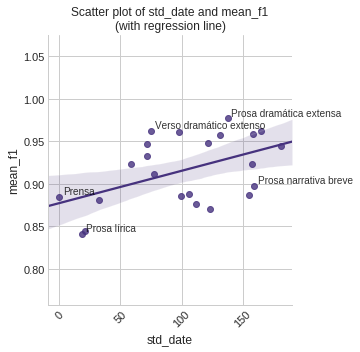

In [61]:
describe_data.describe_corpus_scatter(classes_results_df.rename(columns={"std_prim_fecha": "std_date"}), wdir, "std_date","mean_f1","CORDE", annotation_lt = ["Prosa narrativa breve", "Prosa dramática extensa","Prensa","Prosa lírica","Verso dramático extenso"])

In [47]:
corde_metadatos_modern_df.groupby(["prim_tema"]).head(50).groupby(["prim_tema"]).mean().loc[classes_results_df.index].sort_index()

,formas,tokens,types,prim_fecha,siglo,Artes y espectáculos,Ciencias aplicadas,"Ciencias exactas, físicas y naturales",Ciencias sociales y humanidades,Derecho,...,Prosa narrativa extensa,Religión,Sociedad,Verso dramático,Verso dramático breve,Verso dramático extenso,Verso lírico culto,Verso lírico tradicional,Verso narrativo culto,Verso narrativo tradicional
class,,,,,,,,,,,,,,,,,,,,,
Artes y espectáculos,7008.000000,8038.640000,1196.480000,1611.98,16.520000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Ciencias aplicadas,49342.780000,56836.440000,5184.080000,1779.38,18.240000,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Ciencias exactas, físicas y naturales",124005.320000,143491.620000,9185.240000,1798.50,18.480000,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Ciencias sociales y humanidades,16754.840000,19691.660000,2806.660000,1874.98,19.320000,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Derecho,4759.820000,5313.880000,652.320000,1642.10,16.960000,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
Historia y documentos,1148.900000,1314.580000,433.480000,1651.68,17.020000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Prensa,349.360000,404.160000,196.520000,1974.00,20.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Prosa,16078.500000,19131.900000,3436.600000,1953.15,19.900000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Prosa didáctica,14284.940000,16646.800000,2222.920000,1824.36,18.760000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(classes_results_df[["MFW","sample_size","std_f1","median_tokens","median_prim_fecha","std_prim_fecha","log_median_tokens"]], classes_results_df["mean_f1"])
r_sq = model.score(classes_results_df[["MFW","sample_size","std_f1","median_tokens","median_prim_fecha","std_prim_fecha","log_median_tokens"]], classes_results_df["mean_f1"])
r_sq

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


0.6828480370147778

In [43]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(classes_results_df[["MFW","sample_size","median_tokens","median_prim_fecha","std_prim_fecha","log_median_tokens"]], classes_results_df["mean_f1"])
r_sq = model.score(classes_results_df[["MFW","sample_size","median_tokens","median_prim_fecha","std_prim_fecha","log_median_tokens"]], classes_results_df["mean_f1"])
r_sq

0.40109449255859686

In [59]:
import statsmodels.api as sm

X2 = sm.add_constant(classes_results_df[["median_tokens","median_prim_fecha","std_prim_fecha"]])

est = sm.OLS(classes_results_df["mean_f1"], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                mean_f1   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     3.843
Date:                Fri, 31 Jan 2020   Prob (F-statistic):             0.0264
Time:                        11:37:53   Log-Likelihood:                 47.007
No. Observations:                  23   AIC:                            -86.01
Df Residuals:                      19   BIC:                            -81.47
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 1.0252      0.09

In [54]:
import statsmodels.api as sm

X2 = sm.add_constant(classes_results_df[["median_tokens"]])

est = sm.OLS(classes_results_df["mean_f1"], X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                mean_f1   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     4.482
Date:                Fri, 31 Jan 2020   Prob (F-statistic):             0.0464
Time:                        11:36:55   Log-Likelihood:                 43.778
No. Observations:                  23   AIC:                            -83.56
Df Residuals:                      21   BIC:                            -81.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.9048      0.009     95.610